# Data Cleaning

Following (not exactly) "Jupyter Notebook for Data Science Teams" by Jonathan Whitmore (2016), O'Reilly Media.

Cleaned up the data -- removed 0 production coal mines.

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set();

In [20]:
df = pd.read_excel("C:/Users/Ich/Documents/Data_for_Git_NTBP/coalpublic2014.xls", header=2, index_col='MSHA ID')
df.head()

,Year,Mine Name,Mine State,Mine County,Mine Status,Mine Type,Company Type,Operation Type,Operating Company,Operating Company Address,Union Code,Coal Supply Region,Production (short tons),Average Employees,Labor Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2014,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Indepedent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,71758,6,10494
100759,2014,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Indepedent Producer Operator,Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",United Mine Workers Of America,Appalachia Southern,0,10,20144
103246,2014,Bear Creek,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,40263,17,27476
103451,2014,Knight Mine,Alabama,Franklin,Active,Surface,Indepedent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,100425,21,35560
100329,2014,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,58,134504


In [21]:
df['Company Type'].unique()

array(['Indepedent Producer Operator', 'Operating Subsidiary', 'Contractor'], dtype=object)

In [26]:
df['Company Type'].replace(to_replace='Indepedent Producer Operator', 
                           value='Independent Producer Operator',
                           inplace=True)
df['Company Type'].head()

MSHA ID
103381    Independent Producer Operator
100759    Independent Producer Operator
103246    Independent Producer Operator
103451    Independent Producer Operator
100329             Operating Subsidiary
Name: Company Type, dtype: object

In [27]:
df.rename(columns=lambda x: x.replace(" ", "_"), inplace=True)

In [28]:
df.head()

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
103381,2014,Jesse Creek H.W.M.,Alabama,Bibb,Active,Surface,Independent Producer Operator,Mine only,"Jesse Creek Mining,llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,71758,6,10494
100759,2014,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",United Mine Workers Of America,Appalachia Southern,0,10,20144
103246,2014,Bear Creek,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","912 Edenton Street, Birmingham, AL 35242",NaN,Appalachia Southern,40263,17,27476
103451,2014,Knight Mine,Alabama,Franklin,Active,Surface,Independent Producer Operator,Mine only,"Birmingham Coal & Coke Co., In","P.O. Box 354, Lynn, AL 35242",NaN,Appalachia Southern,100425,21,35560
100329,2014,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,58,134504


In [29]:
len(df)

1360

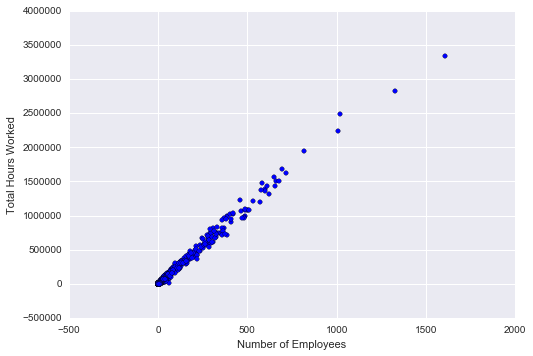

In [34]:
plt.scatter(df.Average_Employees, df.Labor_Hours)
plt.xlabel("Number of Employees")
plt.ylabel("Total Hours Worked")

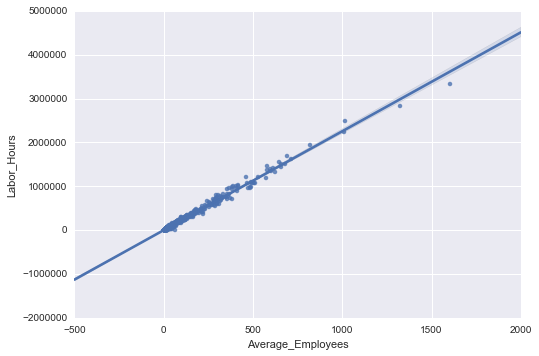

In [37]:
sns.regplot(df.Average_Employees, df.Labor_Hours)
plt.savefig("employee-versus-hours.png")

In [39]:
for column in df.columns:
    print(column)

Year
Mine_Name
Mine_State
Mine_County
Mine_Status
Mine_Type
Company_Type
Operation_Type
Operating_Company
Operating_Company_Address
Union_Code
Coal_Supply_Region
Production_(short_tons)
Average_Employees
Labor_Hours


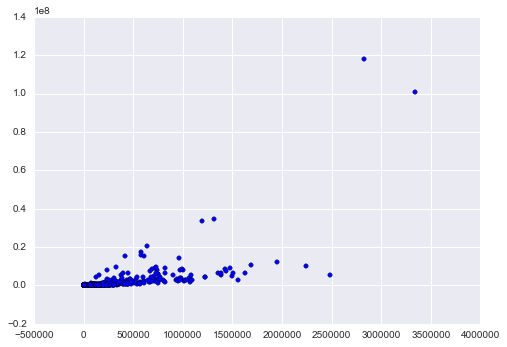

In [41]:
plt.scatter(df.Labor_Hours,df['Production_(short_tons)'])

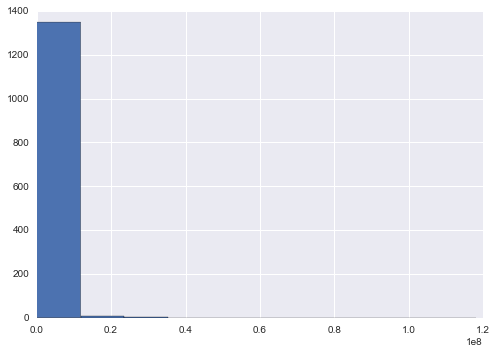

In [42]:
df['Production_(short_tons)'].hist()

In [43]:
df['Production_(short_tons)'] == 0

MSHA ID
103381     False
100759      True
103246     False
103451     False
100329      True
100851     False
102901     False
103101      True
103180     False
103182     False
103222      True
103285     False
103332     False
103375     False
103419     False
103432     False
103437     False
102976      True
102976      True
103380      True
103380      True
103422     False
103467     False
103472     False
101247     False
101401     False
103172     False
103179     False
103323     False
103364     False
           ...  
4801180    False
4801646    False
4801757    False
3304389    False
4407113    False
1100588    False
3608728    False
3609442    False
1518888    False
1519402    False
1519522    False
3604969    False
1519554    False
1519674    False
3608822    False
3609843    False
3606428    False
3609304    False
3609495    False
3609863    False
3609406    False
100515     False
1518401    False
4407233    False
4407325    False
4407329    False
1519707    False
151852

In [45]:
df[df['Production_(short_tons)'] == 0]

,Year,Mine_Name,Mine_State,Mine_County,Mine_Status,Mine_Type,Company_Type,Operation_Type,Operating_Company,Operating_Company_Address,Union_Code,Coal_Supply_Region,Production_(short_tons),Average_Employees,Labor_Hours
MSHA ID,,,,,,,,,,,,,,,
100759,2014,North River #1 Underground Min,Alabama,Fayette,"Active, men working, not producing",Underground,Independent Producer Operator,Preparation Plant,Jim Walter Resources Inc,"3114 County Rd 63 S, Berry, AL 35546",United Mine Workers Of America,Appalachia Southern,0,10,20144
100329,2014,Concord Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,Oak Grove Resources Llc,"8360 Taylors Ferry Rd, Hueytown, AL 35023",United Mine Workers Of America,Appalachia Southern,0,58,134504
103101,2014,Pratt No. 1 Mine,Alabama,Jefferson,Active,Underground,Operating Subsidiary,Preparation Plant,"North Pratt Mining, Llc","P.O. Box 279, Pelham, AL 35124",NaN,Appalachia Southern,0,8,10950
103222,2014,Swasher #1,Alabama,Jefferson,Active,Surface,Independent Producer Operator,Preparation Plant,Swasher Inc,"P.O. Box 436, Graysville, AL 35073",NaN,Appalachia Southern,0,5,7320
102976,2014,Piney Woods Preparation Plant,Alabama,Shelby,Active,Surface,Independent Producer Operator,Preparation Plant,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,0,3,9303
102976,2014,Piney Woods Preparation Plant,Alabama,Shelby,Active,Underground,Independent Producer Operator,Preparation Plant,"Jesse Creek Mining, Llc","1615 Kent Dairy Rd, Alabaster, AL 35007",NaN,Appalachia Southern,0,9,23921
103380,2014,Calera,Alabama,Shelby,Active,Surface,Independent Producer Operator,Preparation Plant,Conrad Yelvington Distributors,"13101 Telecom Dr #101, Tampa, FL 33637",NaN,Appalachia Southern,0,5,10579
103380,2014,Calera,Alabama,Shelby,Active,Underground,Independent Producer Operator,Preparation Plant,Conrad Yelvington Distributors,"13101 Telecom Dr #101, Tampa, FL 33637",NaN,Appalachia Southern,0,2,3717
103155,2014,Corinth Prep Plant,Alabama,Walker,Active,Surface,Independent Producer Operator,Preparation Plant,Warrior Investment Company Inc,"218 Highway 195, Jasper, AL 35503",NaN,Appalachia Southern,0,8,19915


In [46]:
df1 = df[df['Production_(short_tons)'] > 0]

In [47]:
len(df1)

985

In [52]:
df1['log_production'] = np.log(df1['Production_(short_tons)'])

C:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


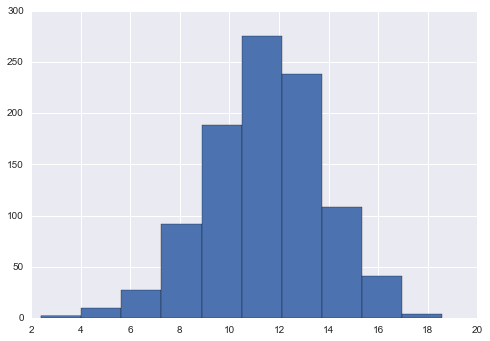

In [53]:
df1.log_production.hist()

In [54]:
df1.to_csv("cleaned_coalpublic2014.csv")